In [197]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [24]:
url = 'International-Tourist-Arrivals_to_Thailand-2022-Jan-Dec.xlsx'

In [184]:
def getTouristThailand(year):
    df = pd.read_excel(url,skiprows=[0,1,2])
    keyword = ['ASEAN','EastAsia','Europe','GrandTotal','SouthAsia',
               'Oceania','MiddleEast','Africa','TheAmericas']
    row,nation,year2022,year2021 = [],[],[],[]
    year2022_Others = 0
    year2021_Others = 0
    for i in range(len(df['Nationality'])):
      k = df.iloc[i]['Nationality']
      k = k.replace(' ','')

      if(not(k in keyword) and len(k)<20 and k!='Others'): 
         nation.append(df.iloc[i].values[0])
         year2022.append(df.iloc[i].values[1])
         year2021.append(df.iloc[i].values[2])   
      if(k=='Others'):
        year2022_Others+=df.iloc[i].values[1]
        year2021_Others+=df.iloc[i].values[2]

    nation.append('Others')
    year2022.append(year2022_Others)
    year2021.append(year2021_Others)

    df = pd.DataFrame({'nation':nation,'2022':year2022,'2021':year2021})
    df = df.set_index('nation')
    #df[year].sum() 
    return df

In [206]:
csv = getTouristThailand(2022)
csv.to_csv('Tourist-Thailand2022.csv')

In [193]:
# จำนวนนักท่องเที่ยวไทยปี 2022
df = getTouristThailand(2022)
top10 = df.sort_values('2022',ascending=False).head(10)
top10

2022     2021
nation                             
Malaysia         1948549.0   5511.0
India             997913.0   6544.0
Singapore         614627.0   5931.0
Korea             538766.0  12077.0
Laos              502124.0    733.0
Vietnam           468393.0   1794.0
USA               453678.0  37880.0
United  Kingdom   444432.0  38663.0
Russia            435008.0  30759.0
Cambodia          379665.0   4914.0

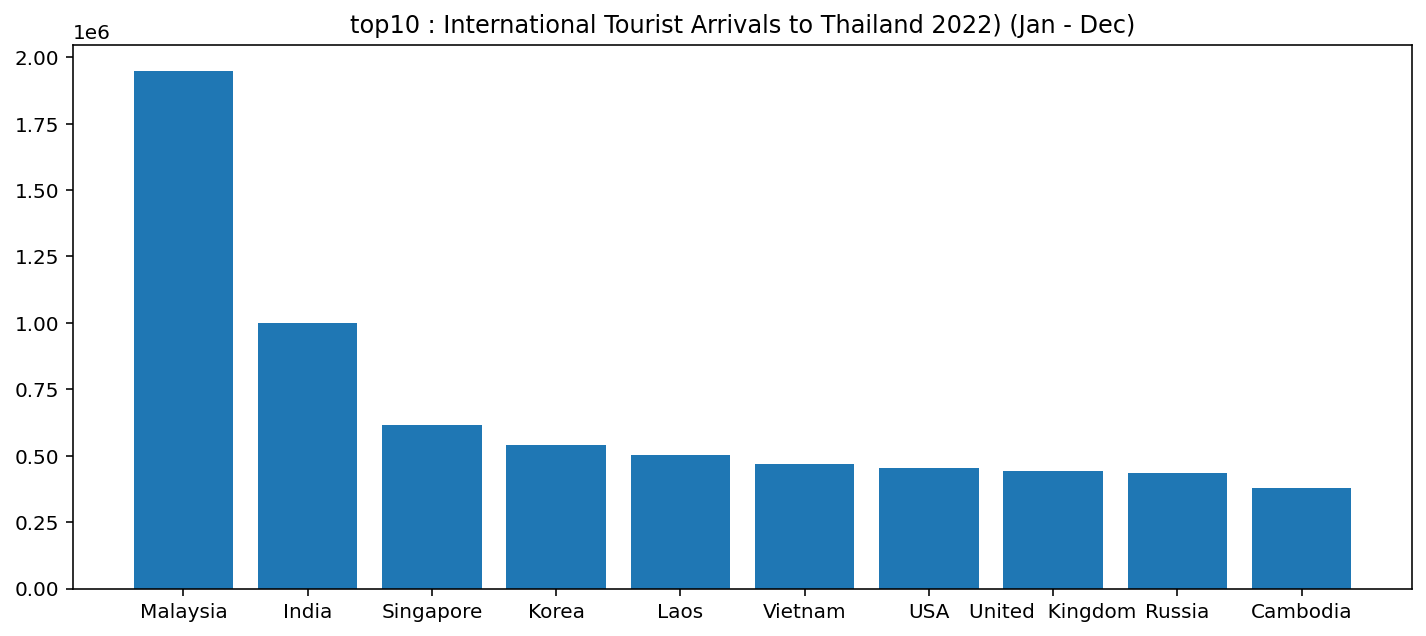

In [204]:
plt.subplots(facecolor='w',figsize=(12,5))
plt.bar(x=top10.index,height=top10['2022'])
plt.title('top10 : International Tourist Arrivals to Thailand 2022) (Jan - Dec)')
plt.show()

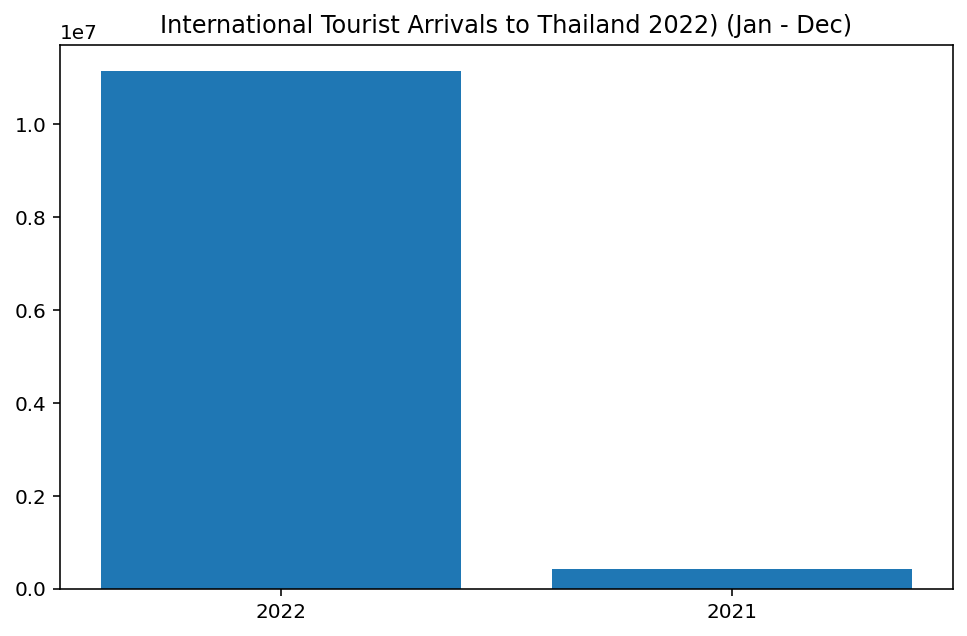

In [203]:
k = [df['2022'].sum(),df['2021'].sum()]
plt.subplots(facecolor='w',figsize=(8,5))
plt.bar(x=['2022','2021'],height=k)
plt.title('International Tourist Arrivals to Thailand 2022) (Jan - Dec)')
plt.show()

In [202]:
k #ที่มา: กองเศรษฐกิจการท่องเที่ยวและกีฬา (ณ วันที่ 23 มกราคม 2565P) 

[11153026.0, 427869.0]